In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [4]:
youtube_video = "https://www.youtube.com/watch?v=l1U54VZQNA8"

In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'l1U54VZQNA8'

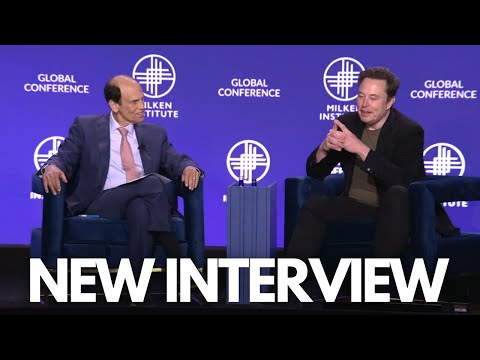

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo(video_id)

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)

[{'text': "let's make life multiplanetary and be a",
  'start': 0.04,
  'duration': 3.24},
 {'text': 'space bearing civilization be out there',
  'start': 1.8,
  'duration': 4.2},
 {'text': 'Among the Stars um you know I think',
  'start': 3.28,
  'duration': 4.32},
 {'text': 'there are things that uh like you have',
  'start': 6.0,
  'duration': 5.36},
 {'text': 'to be excited about the future um you',
  'start': 7.6,
  'duration': 6.079},
 {'text': 'life life cannot just be about solving',
  'start': 11.36,
  'duration': 4.679},
 {'text': 'one problem after another um they have',
  'start': 13.679,
  'duration': 4.161},
 {'text': 'to be things that that that really sort',
  'start': 16.039,
  'duration': 4.361},
 {'text': 'of move your heart and that make you',
  'start': 17.84,
  'duration': 6.88},
 {'text': 'excited to wake up in the morning um and',
  'start': 20.4,
  'duration': 5.879},
 {'text': 'I think being a becoming a space bearing',
  'start': 24.72,
  'duration': 3.16},
 

In [9]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [10]:
transcript[0:5]

[{'text': "let's make life multiplanetary and be a",
  'start': 0.04,
  'duration': 3.24},
 {'text': 'space bearing civilization be out there',
  'start': 1.8,
  'duration': 4.2},
 {'text': 'Among the Stars um you know I think',
  'start': 3.28,
  'duration': 4.32},
 {'text': 'there are things that uh like you have',
  'start': 6.0,
  'duration': 5.36},
 {'text': 'to be excited about the future um you',
  'start': 7.6,
  'duration': 6.079}]

In [11]:
result = ""

for i in transcript:
  result += ' ' + i['text']

print(len(result))

28775


In [12]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [13]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

[' I think there are things that uh like you have to be excited about the future . I think being a becoming a space bearing civilization is one of those things if you ask kids anywhere around the world like what is what are some of the most inspiring things you can ask a like 5-year-old six-years-old anywhere in the world .', " We don't want the Apollo program to be the high Watermark of of human exploration . These Are the Voyages of the Starship Enterprise her ongoing mission to explore strange new worlds to seek out new life forms and new civilizations to boldly go where no one has gone before . When I think about you I . think about Spock and Captain Kirk and you're going to take us to places we've never gone before yeah that's the [Applause] idea .", " The universe is about 13.8 billion years old . A civilization that even lasted a million years is three digits past the decimal point . The first writing was the ancient samarians around 5,500 years ago so that is 1 millionth of Ear

In [14]:
str(summarized_text)

'[\' I think there are things that uh like you have to be excited about the future . I think being a becoming a space bearing civilization is one of those things if you ask kids anywhere around the world like what is what are some of the most inspiring things you can ask a like 5-year-old six-years-old anywhere in the world .\', " We don\'t want the Apollo program to be the high Watermark of of human exploration . These Are the Voyages of the Starship Enterprise her ongoing mission to explore strange new worlds to seek out new life forms and new civilizations to boldly go where no one has gone before . When I think about you I . think about Spock and Captain Kirk and you\'re going to take us to places we\'ve never gone before yeah that\'s the [Applause] idea .", " The universe is about 13.8 billion years old . A civilization that even lasted a million years is three digits past the decimal point . The first writing was the ancient samarians around 5,500 years ago so that is 1 millionth

In [15]:
len(str(summarized_text))

10017